# SARIMA Model

In [1]:
rm(list=ls())
options(warn = -1)

In [2]:
suppressMessages(library(forecast))
suppressMessages(library(ggplot2))

In [3]:
folder <- getwd()
train <- read.csv(file.path(dirname(folder), "data/training.csv"))

y_ts_train <- ts(train$wind_prod, start=c(2015,1,1), frequency=365.25)
X_ts_train <- ts(train[, c(3:30)], start=c(2015,1,1), frequency = 365.25)

In [4]:
# Model estimation
sarima <- auto.arima(y_ts_train, trace=T, seasonal = T, xreg=X_ts_train, ic="aic", stepwise=T,  allowmean = T, allowdrift=T, test="adf")
sarima


 Fitting models using approximations to speed things up...

 ARIMA(2,0,2)(1,0,1)[365.25] with non-zero mean : Inf
 Regression with ARIMA(0,0,0)             errors : 37751.24
 ARIMA(1,0,0)(1,0,0)[365.25] with non-zero mean : Inf
 ARIMA(0,0,1)(0,0,1)[365.25] with non-zero mean : Inf
 Regression with ARIMA(0,0,0)             errors : 37781.69
 ARIMA(0,0,0)(1,0,0)[365.25] with non-zero mean : Inf
 ARIMA(0,0,0)(0,0,1)[365.25] with non-zero mean : Inf
 ARIMA(0,0,0)(1,0,1)[365.25] with non-zero mean : Inf
 Regression with ARIMA(1,0,0)             errors : 37439.7
 ARIMA(1,0,0)(0,0,1)[365.25] with non-zero mean : Inf
 ARIMA(1,0,0)(1,0,1)[365.25] with non-zero mean : Inf
 Regression with ARIMA(2,0,0)             errors : 37440.55
 Regression with ARIMA(1,0,1)             errors : 37438.97
 ARIMA(1,0,1)(1,0,0)[365.25] with non-zero mean : Inf
 ARIMA(1,0,1)(0,0,1)[365.25] with non-zero mean : Inf
 ARIMA(1,0,1)(1,0,1)[365.25] with non-zero mean : Inf
 Regression with ARIMA(0,0,1)             erro

Series: y_ts_train 
Regression with ARIMA(2,0,1) errors 

Coefficients:
         ar1      ar2      ma1  intercept  pressure_sl_m_castelobranco
      1.2621  -0.2809  -0.9431  -5911.263                    -193.6471
s.e.  0.0262   0.0219   0.0164   1418.088                      33.1079
      temperature_c_castelobranco  windspeed_100m_kmh_castelobranco
                         -54.0330                            6.8080
s.e.                      12.2655                            2.0551
      pressure_sl_m_evora  temperature_c_evora  windspeed_100m_kmh_evora
                  92.8578              -0.2847                    3.3098
s.e.              45.0696              12.5599                    2.5399
      pressure_sl_m_faro  temperature_c_faro  windspeed_100m_kmh_faro
                -14.9836            -24.5047                  11.4234
s.e.             20.5894              6.8298                   1.2692
      pressure_sl_m_guarda  temperature_c_guarda  windspeed_100m_kmh_guarda
      

In [5]:
# Coefficients
as.matrix(sarima$coef)

ar1,1.2620747
ar2,-0.2809376
ma1,-0.9431261
intercept,-5911.2629108
pressure_sl_m_castelobranco,-193.6471207
temperature_c_castelobranco,-54.0329639
windspeed_100m_kmh_castelobranco,6.8079733
pressure_sl_m_evora,92.8578262
temperature_c_evora,-0.2847085
windspeed_100m_kmh_evora,3.3097960
pressure_sl_m_faro,-14.9836132


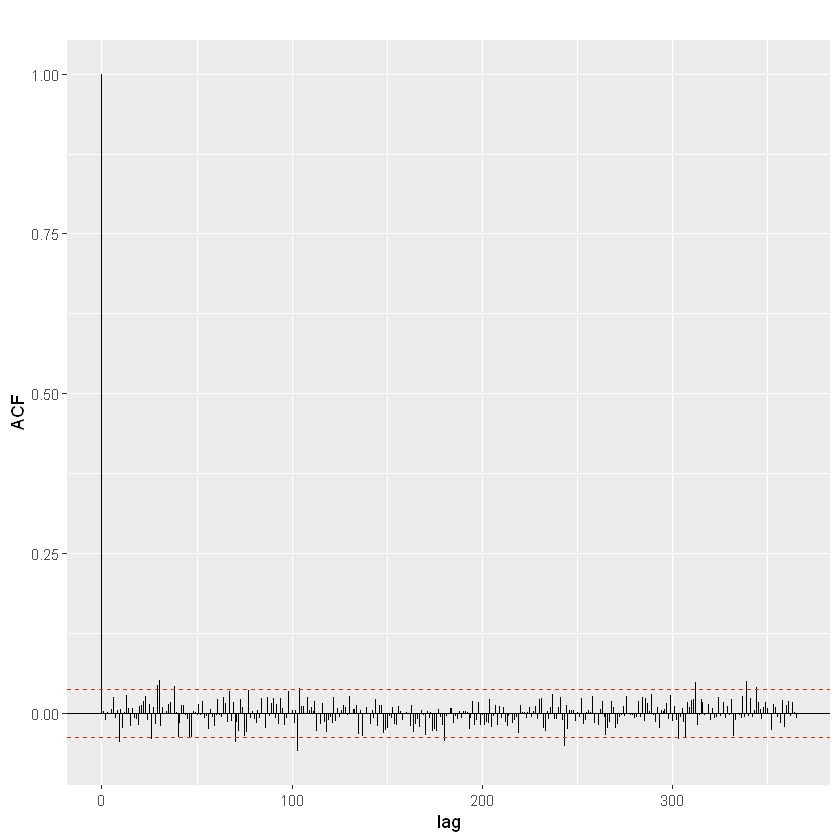

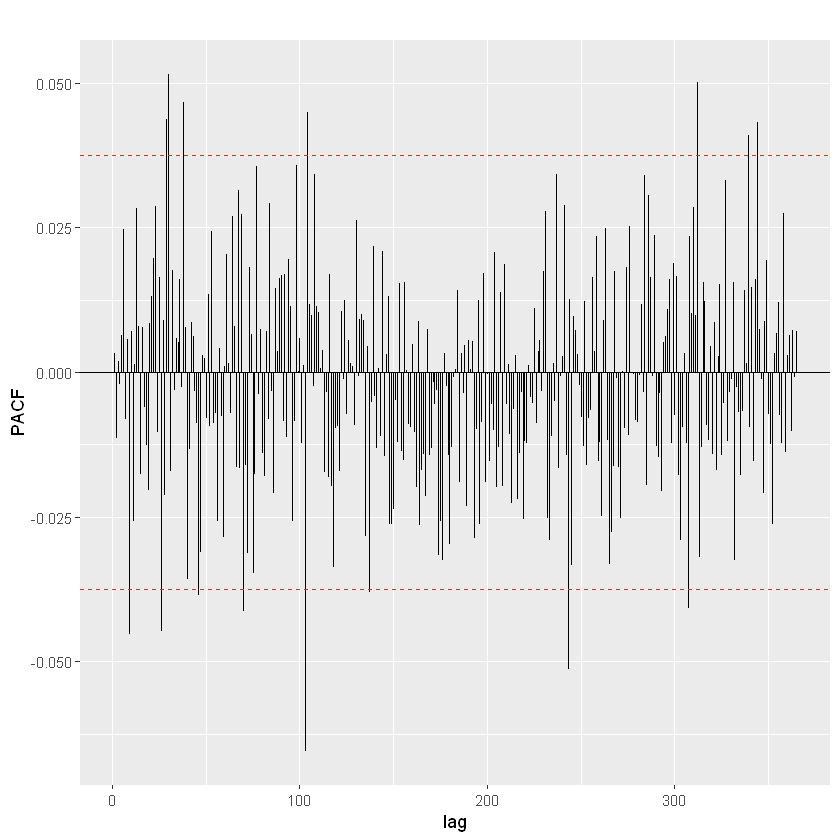

In [6]:
# Residuals Analysis
sarima_fit <- as.data.frame(sarima$fitted)
sarima_fit$date <- as.Date(train$date)
sarima_fit$actual <- train$wind_prod
colnames(sarima_fit)<-c("fitted", "date", "actual")

sarima_fit$residuals <- sarima_fit$actual - sarima_fit$fitted

acf1 <- Acf(sarima_fit$residuals, 365, plot = FALSE)
plotacf1 <- with(acf1, data.frame(lag, acf))
pacf1 <- Pacf(sarima_fit$residuals, 365, plot = FALSE)
plotpacf1 <- with(pacf1, data.frame(lag, acf))

lim1<-(qnorm((1 + (1 - 0.05))/2)/sqrt(2738))
lim2<--lim1

ggplot(data = plotacf1, mapping = aes(x = lag, y = acf)) +
    geom_hline(aes(yintercept = 0)) +
    geom_segment(mapping = aes(xend = lag, yend = 0))+
    geom_hline(aes(yintercept = lim1), linetype = 2, color = 'orangered3')+
    geom_hline(aes(yintercept = lim2), linetype = 2, color = 'orangered3')+
    labs(title="", y="ACF")

ggplot(data = plotpacf1, mapping = aes(x = lag, y = acf)) +
    geom_hline(aes(yintercept = 0)) +
    geom_segment(mapping = aes(xend = lag, yend = 0))+
    geom_hline(aes(yintercept = lim1), linetype = 2, color = 'orangered3')+
    geom_hline(aes(yintercept = lim2), linetype = 2, color = 'orangered3')+
    labs(title="", y="PACF")

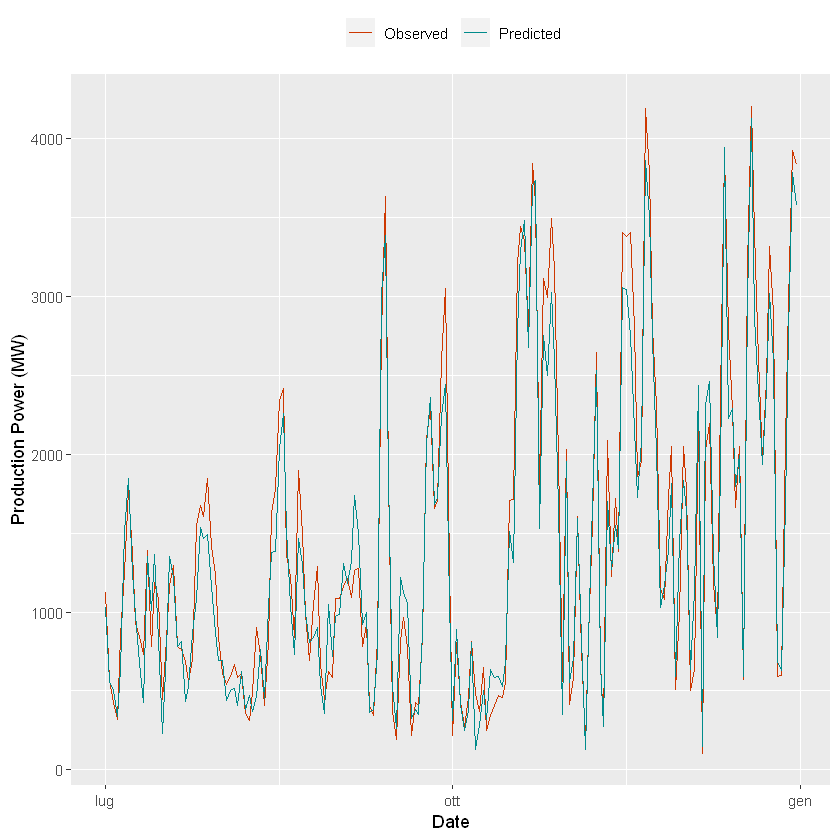

In [7]:
# Predictions
test <- read.csv(file.path(dirname(folder), "data/testing.csv"))

y_ts_test <- ts(test$wind_prod, start=c(2022,7,1), frequency=365.25)
X_ts_test <- ts(test[, c(3:30)], start=c(2022,7,1), frequency = 365.25)

sarima_pred <- forecast(sarima, h = 184, xreg = X_ts_test, level=95)
sarima_df <- cbind(sarima_pred$mean, test$wind_prod)
sarima_df <- as.data.frame(sarima_df)
colnames(sarima_df)<-c("Predicted", "Observed")
sarima_df$date<-as.Date(test$date)

ggplot(sarima_df, aes(x=date,y=Observed))+
    geom_line(aes(x=date,y=Observed, color="Observed")) +
    geom_line(aes(x=date, y=Predicted, color="Predicted")) +
    labs(color="", x="Date", y="Production Power (MW)")+
    scale_colour_manual(values=c("Observed"="orangered3", "Predicted"="cyan4"))+
    theme(legend.position = "top")

In [8]:
# Save predictions
dir.create(file.path(folder, "predictions"))
write.csv(sarima_df, file=file.path(folder, "predictions/sarima_predictions.csv"), row.names = FALSE)